# Titanic

My first experiments with python's data science stuff. Trying to learn how everything works by experimenting with the titanic competition from Kaggle.

## Initial setup

Import the necessary libraries and load the data.

In [107]:
# Wild experiments with the titanic Kaggle competition
# Most comments are redundant and to help me remember things

# We need numpy for its amazing arrays and array computations
import numpy as np
print("numpy version: " + np.__version__)

# We need pandas to turn tabular data into a nice data structure
import pandas as pd
print("pandas version: " + pd.__version__)

# We need matplotlib.pyplot to plot graphs
# Not sure how to print the version of this, plt does not have the __version__ attribute
import matplotlib.pyplot as plt

# train.csv contains our training data
# pandas provides a nice function to read it into a "DataFrame"
data = pd.read_csv("train.csv")

# Print some basic information about our data
print()
print(data.info()) 

numpy version: 1.11.1
pandas version: 0.18.1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


## Initial experiments

Figuring out the basics:
- How to use pandas DataFrames by calculating some simple metrics.
- How to create some simple plots

What to investigate:
- Get some basic data about the survivors, find some good variables that may predict survival chance
- Find out if Sex, Age and Pclass are good predictors

In [62]:
# Calculate the ratio of survivors

# The number of total passengers is the number of rows of the data set
total_passengers = len(data)
print("Total number of passengers: " + str(total_passengers))

# The number of survivors is the number of rows where Survived == 1
total_survivors = len(data.loc[data["Survived"] == 1])
print("Number of survivors: " + str(total_survivors))

# The survivor ratio is the number of survivors divided by the total number of passengers
survivor_ratio = total_survivors / total_passengers
print("Survivor ratio: " + str(survivor_ratio))

Total number of passengers: 891
Number of survivors: 342
Survivor ratio: 0.3838383838383838


In [57]:
# Calculate the ratio of survivors per sex

# Calculate the male survivor ratio

# The number of male passengers is the number of rows where Sex == male
male_passengers = len(data.loc[data["Sex"] == "male"])
print("Number of male passengers: " + str(male_passengers))

# The number of male survivors is the number of rows where Sex == male and Survived == 1
male_survivors = len(data[(data["Sex"] == "male") & (data["Survived"] == 1)])
print("Number of male survivors: " + str(male_survivors))

# The male survivor ratio is the number of male survivors divided by the number of male passengers
male_survivor_ratio = male_survivors / male_passengers
print("Male survivor ratio: " + str(male_survivor_ratio))

print()

# Calculate the female survivor ratio

# The number of female passengers is the number of rows where Sex == female
female_passengers = len(data.loc[data["Sex"] == "female"])
print("Number of female passengers: " + str(female_passengers))

# The number of female survivors is the number of rows where Sex == female and Survived == 1
female_survivors = len(data[(data["Sex"] == "female") & (data["Survived"] == 1)])
print("Number of female survivors: " + str(female_survivors))

# The female survivor ratio is the number of female survivors divided by the number of female passengers
female_survivor_ratio = female_survivors / female_passengers
print("Female survivor ratio: " + str(female_survivor_ratio))

Number of male passengers: 577
Number of male survivors: 109
Male survivor ratio: 0.18890814558058924

Number of female passengers: 314
Number of female survivors: 233
Female survivor ratio: 0.7420382165605095


In [101]:
# A function to create a bar chart

#
# Plot a bar chart
#
# Params:
#       val_groups = List of values per group, elements should be tuples of equal length
#       bar_width = The bar width
#       colors = List of colors, each corresponding to the same index in the val_groups list
#       title = The chart title
#       ylabel = The Y-axis label
#       xticklabels = The X-axis tick labels tuple, must be the same length as val_groups
#       legend = The legend labels tuple, must be the same length as each element in val_groups
#
def plot_bar_chart(val_groups, bar_width, colors, title, ylabel, xticklabels, legend):
    # Clear pyplot
    plt.clf()
    
    # Number of bar groups is the length of the elements in val_groups
    num_bar_groups = len(val_groups[0])
    
    # np.arange creates a range of 0 to n
    # This range will be used as the x locations of our bar groups
    # 0.1 is added to each element to provide some margin
    x_indices = np.arange(num_bar_groups) + 0.1
    
    # I'm not entirely sure what these are
    fig, ax = plt.subplots()
    
    # The list of bar groups
    bar_groups = []
    
    # Set up the bars for each value group
    for i, vals in enumerate(val_groups):
        bars = ax.bar(x_indices + bar_width * i, vals, bar_width, color=colors[i])
        bar_groups.append(bars)
        
    # Set the title of the chart
    ax.set_title(title)
    
    # Set the label of the Y-axis
    ax.set_ylabel(ylabel)
    
    # Set the positions of the X-axis ticks
    ax.set_xticks(x_indices + bar_width)
    
    # Set the tick labels of the X-axis
    ax.set_xticklabels(xticklabels)
    
    # Set the chart legend
    ax.legend(tuple([bars[0] for bars in bar_groups]), legend)
    
    # Display the bar chart
    plt.show()

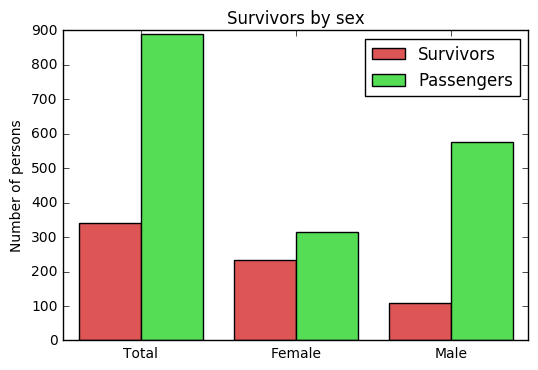

In [105]:
# Create a bar chart with matplotlib to illustrate the male and female survivor ratios
# There will be 3 groups of 2 bars: 
# total survivors and passengers, female survivors and passengers, male survivors and passengers

# The values for the number of survivors bars
bc_sex_survivor_vals = (total_survivors, female_survivors, male_survivors)

# The values for the number of passengers bars
bc_sex_passenger_vals = (total_passengers, female_passengers, male_passengers)

# Create the bar chart
plot_bar_chart([bc_sex_survivor_vals, bc_sex_passenger_vals],
                bar_width = 0.4,
                colors = ["#dd5555", "#55dd55"],
                title = "Survivors by sex",
                ylabel = "Number of persons",
                xticklabels = ("Total", "Female", "Male"),
                legend = ("Survivors", "Passengers"))

In [82]:
# Calculate the ratio of survivors per class
# The classes are 1 (Upper), 2 (Middle), and 3 (Lower)

# Calculate the number of survivors and passengers for each class
rows_pclass1 = data[data["Pclass"] == 1]
rows_pclass2 = data[data["Pclass"] == 2]
rows_pclass3 = data[data["Pclass"] == 3]
pclass1_passengers = len(rows_pclass1)
pclass2_passengers = len(rows_pclass2)
pclass3_passengers = len(rows_pclass3)
pclass1_survivors = len(rows_pclass1[rows_pclass1["Survived"] == 1])
pclass2_survivors = len(rows_pclass2[rows_pclass2["Survived"] == 1])
pclass3_survivors = len(rows_pclass3[rows_pclass3["Survived"] == 1])
pclass1_survivor_ratio = pclass1_survivors / pclass1_passengers
pclass2_survivor_ratio = pclass2_survivors / pclass2_passengers
pclass3_survivor_ratio = pclass3_survivors / pclass3_passengers

print("Number of first class passengers: " + str(pclass1_passengers))
print("Number of first class survivors: " + str(pclass1_survivors))
print("First class survivor ratio: " + str(pclass1_survivor_ratio))
print("Number of middle class passengers: " + str(pclass2_passengers))
print("Number of middle class survivors: " + str(pclass2_survivors))
print("Middle class survivor ratio: " + str(pclass2_survivor_ratio))
print("Number of lower class passengers: " + str(pclass3_passengers))
print("Number of lower class survivors: " + str(pclass3_survivors))
print("Lower class survivor ratio: " + str(pclass3_survivor_ratio))

Number of first class passengers: 216
Number of first class survivors: 136
First class survivor ratio: 0.6296296296296297
Number of middle class passengers: 184
Number of middle class survivors: 87
Middle class survivor ratio: 0.47282608695652173
Number of lower class passengers: 491
Number of lower class survivors: 119
Lower class survivor ratio: 0.24236252545824846


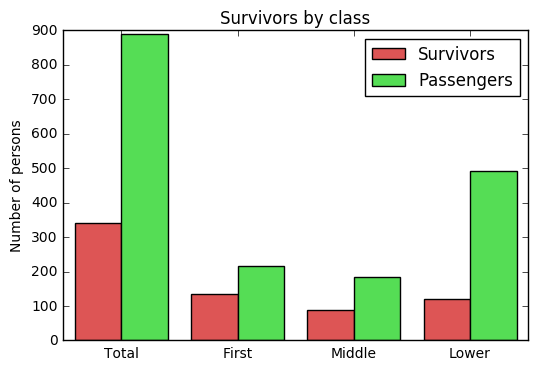

In [106]:
# Create a bar chart to illustrate the class survivor ratios
# There will be 4 groups of 2 bars: 
# total survivors and passengers, and one group for each of the three classes

# The values for the number of survivors bars
bc_class_survivor_vals = (total_survivors, pclass1_survivors, pclass2_survivors, pclass3_survivors)

# The values for the number of passengers bars
bc_class_passenger_vals = (total_passengers, pclass1_passengers, pclass2_passengers, pclass3_passengers)

# Create the bar chart
plot_bar_chart([bc_class_survivor_vals, bc_class_passenger_vals],
                bar_width = 0.4,
                colors = ["#dd5555", "#55dd55"],
                title = "Survivors by class",
                ylabel = "Number of persons",
                xticklabels = ("Total", "First", "Middle", "Lower"),
                legend = ("Survivors", "Passengers"))

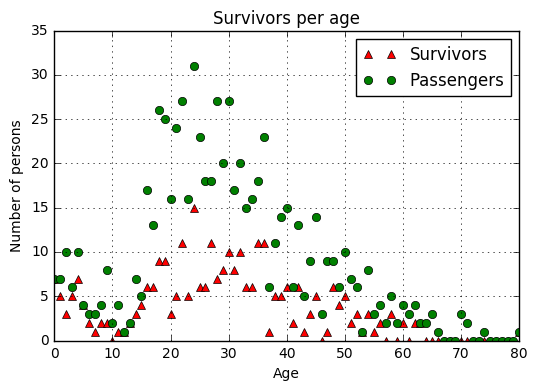

In [185]:
# Create a line graph of survivors and passengers by age

# Clear pyplot
plt.clf()

# Select the passengers with known ages
known_ages = data[np.logical_not(np.isnan(data["Age"]))]

# Turn off the is_copy flag to avoid false positive warnings. It's an intentional copy.
known_ages.is_copy = False

# Round each age down to the nearest integer
known_ages.loc[:,"Age"] = np.floor(known_ages["Age"])
floored_ages = known_ages["Age"]

# The X-indices of the line graph
lg_age_x_indices = np.arange(floored_ages.min(), floored_ages.max() + 1)

# The Y-values
lg_age_passengers = []
lg_age_survivors = []

# There is probably a much more efficient way to set up these lists
for age in lg_age_x_indices:
    num_passengers = len(known_ages[known_ages["Age"] == age])
    num_survivors = len(known_ages[(known_ages["Survived"] == 1) & (known_ages["Age"] == age)])
    lg_age_passengers.append(num_passengers)
    lg_age_survivors.append(num_survivors)
    
# Plot the graphs
plt.plot(lg_age_x_indices, lg_age_survivors, "r^", lg_age_x_indices, lg_age_passengers, "go")

# Set the graph title
plt.title("Survivors per age")

# Set the Y-axis label
plt.ylabel("Number of persons")

# Set the X-axis label
plt.xlabel("Age")

# Set the legend
plt.legend(("Survivors", "Passengers"))

# Turn on the grid
plt.grid()

# Display the graph
plt.show()

### Conclusions

- Female passengers appear to have a higher chance of surviving than male passengers
- There appears to be a positive correlation between class and survival chance
- Surival chance appears to be the highest among passengers between the ages 16 and 36